# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from pprint import pprint
import datetime

# Import API key
from api_keys import api_key
url = "http://api.openweathermap.org/data/2.5/weather?q="

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Testing the API with London to see what the response data looks like
response = requests.get(f"{url}London&&units=imperial&APPID={api_key}")
print(response.url)
data = response.json()
pprint(data)

http://api.openweathermap.org/data/2.5/weather?q=London&&units=imperial&APPID=482f0bce7aa613e189f5dd3c3852eeca
{'base': 'stations',
 'clouds': {'all': 11},
 'cod': 200,
 'coord': {'lat': 51.51, 'lon': -0.13},
 'dt': 1568523290,
 'id': 2643743,
 'main': {'humidity': 93,
          'pressure': 1025,
          'temp': 48.69,
          'temp_max': 55,
          'temp_min': 42.01},
 'name': 'London',
 'sys': {'country': 'GB',
         'id': 1417,
         'message': 0.0159,
         'sunrise': 1568525690,
         'sunset': 1568571431,
         'type': 1},
 'timezone': 3600,
 'visibility': 10000,
 'weather': [{'description': 'fog', 'icon': '50n', 'id': 741, 'main': 'Fog'}],
 'wind': {'speed': 2.24}}


In [4]:
#lists for city name, lat, lon, temp, humidity, windspeed, cloudiness, skipped cities
cityList = []
latList = []
lonList = []
tempList = []
humList = []
wsList = []
cldList = []
skips = []

#date when the data was collected
d = str(datetime.datetime.today())
d = d[:10]

i = 0
while len(latList) < 500:
    
    city = cities[i]
    
    response = requests.get(f"{url}{city}&units=imperial&APPID={api_key}")
    data = response.json()
    
    #was getting a 404 error for some cities so we skip them to build our list of 500
    if data['cod'] != '404':
        
        lat = data['coord']['lat']
        lon = data['coord']['lon']
        temp = data['main']['temp']
        hum = data['main']['humidity']
        ws = data['wind']['speed']
        cld = data['clouds']['all']
        
        #print data for each city
        print(f"{i+1}: {city} ({lat}, {lon})  Temp: {temp}  Cloudiness: {cld}  Humidity: {hum} Wind Speed: {ws}")
        
        #add data for each city to end of each list
        cityList.append(city)
        latList.append(lat)
        lonList.append(lon)
        tempList.append(temp)
        humList.append(hum)
        wsList.append(ws)
        cldList.append(cld)
        
    else:
        print(f"No data for {city} trying next city...")
        skips.append(city)
        
    i = i + 1
    
print(f"{len(skips)} cities skipped.")     
    

1: sumbe (-11.2, 13.84)  Temp: 69.71  Cloudiness: 78  Humidity: 85 Wind Speed: 6.4
No data for candawaga trying next city...
3: hobart (-42.88, 147.33)  Temp: 61.18  Cloudiness: 0  Humidity: 27 Wind Speed: 12.75
4: mataura (-46.19, 168.86)  Temp: 54  Cloudiness: 58  Humidity: 68 Wind Speed: 1.99
5: roma (41.89, 12.48)  Temp: 65.26  Cloudiness: 0  Humidity: 82 Wind Speed: 2.24
6: zyryanka (65.73, 150.89)  Temp: 58.55  Cloudiness: 100  Humidity: 58 Wind Speed: 4.83
7: albany (42.65, -73.75)  Temp: 61.79  Cloudiness: 90  Humidity: 93 Wind Speed: 5.82
8: saldanha (41.42, -6.55)  Temp: 63.41  Cloudiness: 53  Humidity: 64 Wind Speed: 4.25
9: laguna (16.17, -88.94)  Temp: 78.8  Cloudiness: 20  Humidity: 94 Wind Speed: 1.86
10: kapaa (22.08, -159.32)  Temp: 79.83  Cloudiness: 75  Humidity: 78 Wind Speed: 12.75
11: masterton (-40.95, 175.66)  Temp: 55.99  Cloudiness: 49  Humidity: 75 Wind Speed: 11.99
12: burnie (-41.05, 145.91)  Temp: 54.41  Cloudiness: 95  Humidity: 46 Wind Speed: 8.08
13: pu

99: saint-philippe (45.36, -73.48)  Temp: 61.99  Cloudiness: 40  Humidity: 63 Wind Speed: 12.75
100: taoudenni (22.68, -3.98)  Temp: 92.39  Cloudiness: 0  Humidity: 23 Wind Speed: 5.95
101: acapulco (16.86, -99.88)  Temp: 84.2  Cloudiness: 75  Humidity: 79 Wind Speed: 4.7
102: mutoko (-17.4, 32.23)  Temp: 68.99  Cloudiness: 22  Humidity: 30 Wind Speed: 5.73
103: ponta do sol (-20.63, -46)  Temp: 66.65  Cloudiness: 10  Humidity: 58 Wind Speed: 7.7
104: khurai (24.04, 78.33)  Temp: 78.53  Cloudiness: 99  Humidity: 86 Wind Speed: 5.08
105: namibe (-15.19, 12.15)  Temp: 65.21  Cloudiness: 36  Humidity: 76 Wind Speed: 7.94
No data for palabuhanratu trying next city...
No data for tsihombe trying next city...
108: victoria (5.28, 115.24)  Temp: 87.67  Cloudiness: 75  Humidity: 74 Wind Speed: 3.36
109: coihaique (-45.58, -72.07)  Temp: 32  Cloudiness: 20  Humidity: 99 Wind Speed: 1.12
No data for tungkang trying next city...
111: peniche (39.36, -9.38)  Temp: 67.66  Cloudiness: 0  Humidity: 6

199: matagalpa (12.92, -85.92)  Temp: 66.11  Cloudiness: 73  Humidity: 98 Wind Speed: 4.14
200: yaan (7.38, 8.57)  Temp: 73.31  Cloudiness: 100  Humidity: 96 Wind Speed: 4.09
201: ostrovnoy (68.05, 39.51)  Temp: 43.43  Cloudiness: 100  Humidity: 98 Wind Speed: 25.46
202: college (64.86, -147.8)  Temp: 53.96  Cloudiness: 1  Humidity: 58 Wind Speed: 6.93
203: bethel (60.79, -161.76)  Temp: 53.02  Cloudiness: 90  Humidity: 87 Wind Speed: 10.29
No data for tidore trying next city...
205: humaita (-24.93, -65.37)  Temp: 58.26  Cloudiness: 0  Humidity: 67 Wind Speed: 5.82
206: provideniya (64.42, -173.23)  Temp: 44.15  Cloudiness: 100  Humidity: 76 Wind Speed: 6.55
207: fortuna (40.6, -124.16)  Temp: 59.29  Cloudiness: 40  Humidity: 93 Wind Speed: 5.82
208: san quintin (17.54, 120.52)  Temp: 84.47  Cloudiness: 13  Humidity: 71 Wind Speed: 6.73
209: santa isabel do rio negro (-0.41, -65.02)  Temp: 75.65  Cloudiness: 81  Humidity: 82 Wind Speed: 2.1
210: tura (64.27, 100.22)  Temp: 35.69  Clou

298: vila velha (-3.71, -38.6)  Temp: 78.31  Cloudiness: 75  Humidity: 78 Wind Speed: 18.34
299: san rafael (-34.61, -68.33)  Temp: 55.67  Cloudiness: 5  Humidity: 27 Wind Speed: 14.2
300: mandalgovi (45.76, 106.27)  Temp: 54.95  Cloudiness: 0  Humidity: 27 Wind Speed: 10.27
301: bandarbeyla (9.49, 50.81)  Temp: 86.63  Cloudiness: 25  Humidity: 48 Wind Speed: 25.9
302: saint-joseph (43.56, 6.97)  Temp: 64.45  Cloudiness: 0  Humidity: 77 Wind Speed: 4.7
303: tarko-sale (64.92, 77.78)  Temp: 36  Cloudiness: 60  Humidity: 93 Wind Speed: 9.28
304: dolores (-33.53, -58.22)  Temp: 54  Cloudiness: 17  Humidity: 96 Wind Speed: 1.01
No data for rungata trying next city...
306: karratha (-20.74, 116.85)  Temp: 96.71  Cloudiness: 69  Humidity: 5 Wind Speed: 15.57
307: doctor juan leon mallorquin (-25.4, -55.27)  Temp: 75.2  Cloudiness: 0  Humidity: 78 Wind Speed: 3.36
308: port augusta (-32.49, 137.76)  Temp: 88.61  Cloudiness: 18  Humidity: 13 Wind Speed: 20.8
309: sandpoint (48.28, -116.55)  Te

394: ola (59.58, 151.3)  Temp: 48.83  Cloudiness: 100  Humidity: 81 Wind Speed: 32.64
395: husavik (50.56, -96.99)  Temp: 55.44  Cloudiness: 85  Humidity: 87 Wind Speed: 7
396: carthage (32.16, -94.34)  Temp: 78.35  Cloudiness: 1  Humidity: 58 Wind Speed: 2.89
397: huicheng (23.03, 116.29)  Temp: 87.8  Cloudiness: 40  Humidity: 62 Wind Speed: 8.95
398: omalur (11.74, 78.05)  Temp: 86  Cloudiness: 75  Humidity: 70 Wind Speed: 5.06
399: revelstoke (50.99, -118.19)  Temp: 55.4  Cloudiness: 90  Humidity: 100 Wind Speed: 2.24
400: quelimane (-17.88, 36.89)  Temp: 73.4  Cloudiness: 40  Humidity: 88 Wind Speed: 5.82
No data for nizhneyansk trying next city...
402: nouadhibou (20.93, -17.03)  Temp: 73.13  Cloudiness: 14  Humidity: 75 Wind Speed: 16.44
403: nioro (13.79, -15.05)  Temp: 75.29  Cloudiness: 100  Humidity: 94 Wind Speed: 3.91
404: moroto (2.53, 34.66)  Temp: 76.01  Cloudiness: 9  Humidity: 49 Wind Speed: 1.3
405: alta floresta (-9.87, -56.08)  Temp: 74.57  Cloudiness: 25  Humidity:

490: kaeo (-35.1, 173.78)  Temp: 58.01  Cloudiness: 99  Humidity: 85 Wind Speed: 4.18
491: dutse (11.76, 9.34)  Temp: 75.29  Cloudiness: 73  Humidity: 82 Wind Speed: 7.78
492: mizan teferi (6.99, 35.58)  Temp: 76.37  Cloudiness: 15  Humidity: 57 Wind Speed: 0.25
493: chipinge (-20.19, 32.62)  Temp: 71.51  Cloudiness: 2  Humidity: 60 Wind Speed: 4.97
494: phek (25.7, 94.46)  Temp: 85.37  Cloudiness: 83  Humidity: 72 Wind Speed: 4.25
495: tautira (-17.73, -149.15)  Temp: 77  Cloudiness: 75  Humidity: 65 Wind Speed: 5.82
No data for urumqi trying next city...
497: guilin (25.28, 110.29)  Temp: 91.4  Cloudiness: 20  Humidity: 55 Wind Speed: 4.47
498: nebbi (2.48, 31.09)  Temp: 72.59  Cloudiness: 11  Humidity: 75 Wind Speed: 2.46
499: sinnamary (5.38, -52.96)  Temp: 80.87  Cloudiness: 40  Humidity: 84 Wind Speed: 7.11
500: lipin bor (60.26, 37.97)  Temp: 45.23  Cloudiness: 53  Humidity: 74 Wind Speed: 8.79
501: sola (-3.17, 33.8)  Temp: 79.25  Cloudiness: 0  Humidity: 42 Wind Speed: 7.81
50

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#create a dataframe from our lists
data_df = pd.DataFrame({
    'City': cityList,
    'Lat': latList,
    'Lon': lonList,
    'Temp(F)': tempList,
    'Humidity%': humList,
    'Wind Speed': wsList,
    'Cloudiness%': cldList
    
})
data_df.head()

,City,Lat,Lon,Temp(F),Humidity%,Wind Speed,Cloudiness%
0,sumbe,-11.20,13.84,69.71,85,6.40,78
1,hobart,-42.88,147.33,61.18,27,12.75,0
2,mataura,-46.19,168.86,54.00,68,1.99,58
3,roma,41.89,12.48,65.26,82,2.24,0
4,zyryanka,65.73,150.89,58.55,58,4.83,100


In [6]:
#export to CSV file
data_df.to_csv("cityWeather.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

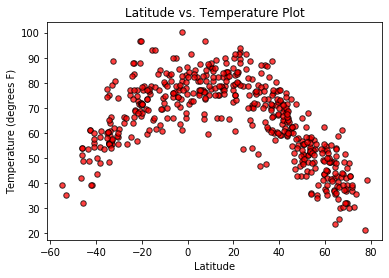

In [7]:
x_axis = data_df['Lat']
temp = data_df['Temp(F)']
plt.scatter(x_axis, temp, marker="o", facecolors="red", edgecolors="black",
            s=30, alpha=0.75)
# Set a Title and labels
plt.title("Latitude vs. Temperature Plot")
plt.xlabel("Latitude")
plt.ylabel("Temperature (degrees F)")
plt.savefig('tempPlot.png')

#### Latitude vs. Humidity Plot

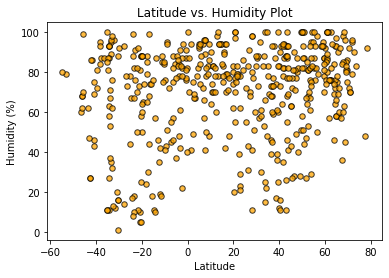

In [8]:
x_axis = data_df['Lat']
hum = data_df['Humidity%']
plt.scatter(x_axis, hum, marker="o", facecolors="orange", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig('humPlot.png')

#### Latitude vs. Cloudiness Plot

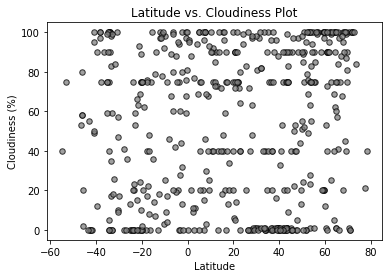

In [9]:
x_axis = data_df['Lat']
cld = data_df['Cloudiness%']
plt.scatter(x_axis, cld, marker="o", facecolors="grey", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Cloudiness Plot")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig('cldPlot.png')

#### Latitude vs. Wind Speed Plot

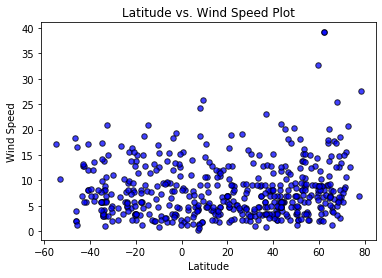

In [10]:
x_axis = data_df['Lat']
ws = data_df['Wind Speed']
plt.scatter(x_axis, ws, marker="o", facecolors="blue", edgecolors="black",
            s=30, alpha=0.75)
plt.title("Latitude vs. Wind Speed Plot")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig('wsPlot.png')